In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance_data (1).csv to insurance_data (1).csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [ ]:
X=np.array(df[['age','affordibility']])

In [ ]:
X

array([[22,  1],
       [25,  0],
       [47,  1],
       [52,  0],
       [46,  1],
       [56,  1],
       [55,  0],
       [60,  0],
       [62,  1],
       [61,  1],
       [18,  1],
       [28,  1],
       [27,  0],
       [29,  0],
       [49,  1],
       [55,  1],
       [25,  0],
       [58,  1],
       [19,  0],
       [18,  1],
       [21,  1],
       [26,  0],
       [40,  1],
       [45,  1],
       [50,  1],
       [54,  1],
       [23,  1],
       [46,  1]])

In [ ]:
y=np.array(df.bought_insurance)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [ ]:
X_train

array([[55,  1],
       [62,  1],
       [61,  1],
       [19,  0],
       [23,  1],
       [22,  1],
       [49,  1],
       [56,  1],
       [54,  1],
       [40,  1],
       [60,  0],
       [50,  1],
       [45,  1],
       [47,  1],
       [27,  0],
       [21,  1],
       [52,  0],
       [25,  0],
       [18,  1],
       [46,  1],
       [46,  1],
       [58,  1]])

In [ ]:
import sklearn.linear_model as lm
model=lm.LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([0.02137267, 0.26574741])

In [ ]:
model.intercept_

-0.5329452874082867

In [ ]:
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df[['age', 'affordibility']].values
y = df['bought_insurance'].values



In [ ]:
# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [ ]:
# Gradient Descent function for logistic regression
def gradient_descent(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    cost_history = []

    for _ in range(epochs):
        # Model predictions
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)

        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute cost (log-loss)
        cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        cost_history.append(cost)

    return weights, bias, cost_history



In [ ]:
# Perform gradient descent
learning_rate = 0.1
epochs = 1000
weights, bias, cost_history = gradient_descent(X_train, y_train, learning_rate, epochs)



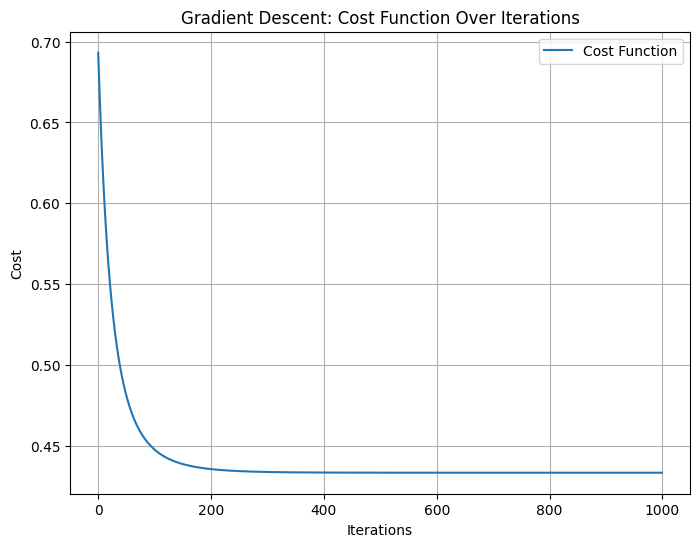

In [ ]:
# Plot the cost function over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), cost_history, label='Cost Function')
plt.title('Gradient Descent: Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()